Class distribution before balancing:
 target
No_Disease        13145
Low_Risk           1643
High_Risk           657
Moderate_Risk       657
Severe_Disease      328
Name: count, dtype: int64
Class distribution before balancing:
 target
No_Disease        13145
Low_Risk           1643
High_Risk           657
Moderate_Risk       657
Severe_Disease      328
Name: count, dtype: int64

Target sampling strategy:
 {'No_Disease': np.int64(13145), 'Low_Risk': 6575, 'Moderate_Risk': 2629, 'High_Risk': 2629, 'Severe_Disease': 1312}

Class distribution after balancing:
 target
No_Disease        13145
Low_Risk           6575
High_Risk          2629
Moderate_Risk      2629
Severe_Disease     1312
Name: count, dtype: int64


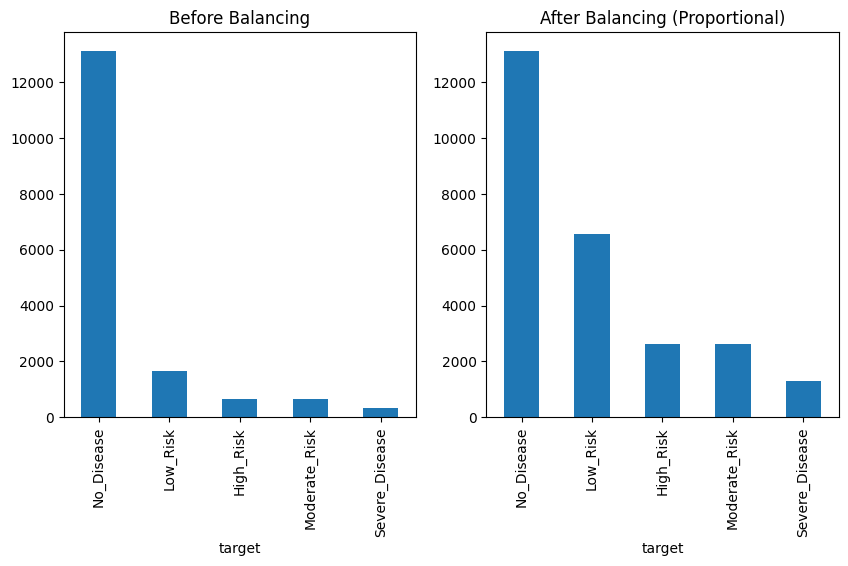

(20538, 37)
['age_of_the_patient', 'blood_pressure_mm_hg_', 'specific_gravity_of_urine', 'albumin_in_urine', 'sugar_in_urine', 'random_blood_glucose_level_mg_dl_', 'blood_urea_mg_dl_', 'serum_creatinine_mg_dl_', 'sodium_level_meq_l_', 'potassium_level_meq_l_', 'hemoglobin_level_gms_', 'packed_cell_volume_', 'white_blood_cell_count_cells_cumm_', 'red_blood_cell_count_millions_cumm_', 'estimated_glomerular_filtration_rate_egfr_', 'urine_protein_to_creatinine_ratio', 'urine_output_ml_day_', 'serum_albumin_level', 'cholesterol_level', 'parathyroid_hormone_pth_level', 'serum_calcium_level', 'serum_phosphate_level', 'body_mass_index_bmi_', 'cystatin_c_level', 'c_reactive_protein_crp_level', 'interleukin_6_il_6_level', 'red_blood_cells_in_urine', 'pus_cells_in_urine', 'pus_cell_clumps_in_urine', 'bacteria_in_urine', 'hypertension_yes_no_', 'diabetes_mellitus_yes_no_', 'coronary_artery_disease_yes_no_', 'anemia_yes_no_', 'family_history_of_chronic_kidney_disease', 'urinary_sediment_microscopy_

,age_of_the_patient,blood_pressure_mm_hg_,specific_gravity_of_urine,albumin_in_urine,sugar_in_urine,random_blood_glucose_level_mg_dl_,blood_urea_mg_dl_,serum_creatinine_mg_dl_,sodium_level_meq_l_,potassium_level_meq_l_,...,pus_cells_in_urine,pus_cell_clumps_in_urine,bacteria_in_urine,hypertension_yes_no_,diabetes_mellitus_yes_no_,coronary_artery_disease_yes_no_,anemia_yes_no_,family_history_of_chronic_kidney_disease,urinary_sediment_microscopy_results,target
0,54,167,1.023,1,4,96,169.101369,7.55,146.068410,6.272576,...,0,0,0,1,1,0,0,0,1,No_Disease
1,42,127,1.023,3,2,73,183.223479,13.37,123.501427,5.611303,...,1,0,1,0,1,0,1,1,0,Low_Risk
2,38,148,1.016,0,0,77,193.141665,9.49,149.456527,3.965957,...,1,0,0,0,0,1,0,0,0,No_Disease
3,7,98,1.017,4,0,225,125.939396,10.98,131.758843,4.980997,...,1,0,1,0,0,1,1,0,0,No_Disease
4,67,174,1.015,1,1,376,197.188600,3.01,120.912465,4.097602,...,0,0,0,0,0,0,1,0,1,No_Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13140,8,81,1.008,4,4,288,50.652307,13.50,144.459415,5.915807,...,1,0,1,1,1,1,1,0,1,No_Disease
13141,38,178,1.006,2,5,402,74.935697,12.38,141.545128,4.428253,...,1,0,0,1,0,0,1,1,0,No_Disease
13142,37,85,1.016,0,0,268,182.084682,6.62,137.849567,4.941271,...,0,1,1,1,0,0,1,1,1,No_Disease
13143,67,173,1.011,3,5,190,93.149088,6.08,134.417734,4.604446,...,0,1,0,0,1,0,0,0,0,High_Risk


In [2]:
# === Member F: Data Splitting & Class Imbalance Handling ===
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# === Setup ===
df = pd.read_csv("C:\\Users\\TUF\\OneDrive\\Desktop\\SLIIT 2Y1S\\AI and ML\\Project\\AIML_Project\\kidney_disease_dataset(S).csv")
df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w]+', '_', regex=True)

# Keep only useful columns
useful_cols = [
    'age_of_the_patient','blood_pressure_mm_hg_','specific_gravity_of_urine','albumin_in_urine',
    'sugar_in_urine','random_blood_glucose_level_mg_dl_','blood_urea_mg_dl_','serum_creatinine_mg_dl_',
    'sodium_level_meq_l_','potassium_level_meq_l_','hemoglobin_level_gms_','packed_cell_volume_',
    'white_blood_cell_count_cells_cumm_','red_blood_cell_count_millions_cumm_',
    'estimated_glomerular_filtration_rate_egfr_','urine_protein_to_creatinine_ratio','urine_output_ml_day_',
    'serum_albumin_level','cholesterol_level','parathyroid_hormone_pth_level','serum_calcium_level',
    'serum_phosphate_level','body_mass_index_bmi_','cystatin_c_level','c_reactive_protein_crp_level',
    'interleukin_6_il_6_level','red_blood_cells_in_urine','pus_cells_in_urine','pus_cell_clumps_in_urine',
    'bacteria_in_urine','hypertension_yes_no_','diabetes_mellitus_yes_no_','coronary_artery_disease_yes_no_',
    'anemia_yes_no_','family_history_of_chronic_kidney_disease','urinary_sediment_microscopy_results','target'
]
df = df[useful_cols]

# === Encode categorical variables ===
target = "target"
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    if col != target:
        df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(columns=[target])
y = df[target]

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print("Class distribution before balancing:\n", y_train.value_counts())

# === Handle Class Imbalance (Proportional Oversampling) ===
from imblearn.over_sampling import RandomOverSampler

print("Class distribution before balancing:\n", y_train.value_counts())

# Step 1: Get majority class size (No_Disease)
majority_count = y_train.value_counts()['No_Disease']

# Step 2: Define disease subtypes
disease_subs = ['Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease']

# Step 3: Calculate proportions of each disease subtype
sub_counts = y_train.value_counts()[disease_subs]
sub_total = sub_counts.sum()
sub_proportions = sub_counts / sub_total

# Step 4: Redistribute so that sum of disease subtypes = majority_count
target_sub_counts = (sub_proportions * majority_count).round().astype(int)

# Step 5: Build sampling strategy
sampling_strategy = {'No_Disease': majority_count}
sampling_strategy.update(target_sub_counts.to_dict())

print("\nTarget sampling strategy:\n", sampling_strategy)

# Step 6: Apply RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

# === Check class distribution after balancing ===
print("\nClass distribution after balancing:\n", pd.Series(y_train_bal).value_counts())

# === EDA Visualization: Target Distribution Before vs After ===
fig, ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot(kind='bar', ax=ax[0], title="Before Balancing")
pd.Series(y_train_bal).value_counts().plot(kind='bar', ax=ax[1], title="After Balancing (Proportional)")
plt.show()


print(df.shape)        # shows number of rows and columns
print(df.columns.tolist())  # lists all column names

df.head(13145)


